In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [6]:
pip install --upgrade pip

   ---------------------------------------- 2.1/2.1 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_boston_data():
    boston = tf.keras.datasets.boston_housing
    return boston.load_data()

In [3]:
def preprocess_data(x_train, x_test, y_train, y_test):
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

    return x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled

In [4]:
def build_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, name='input-layer'),
        tf.keras.layers.Dense(100, name='hidden-layer-2'),
        tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
        tf.keras.layers.Dense(50, name='hidden-layer-4'),
        tf.keras.layers.Dense(1, name='output-layer')
    ])

    return model

In [5]:
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

In [6]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=32):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    return history

In [7]:
def plot_metrics(history):
    pd.DataFrame(history.history).plot(figsize=(10, 7))
    plt.title("Metrics graph")
    plt.show()

In [8]:
def make_predictions(model, x_test):
    return model.predict(x_test)

In [9]:
def plot_regression_line(y_test, y_pred):
    sns.regplot(x=y_test, y=y_pred)
    plt.title("Regression Line for Predicted values")
    plt.show()

In [10]:
def regression_metrics_display(y_test, y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [11]:
boston_data = load_boston_data()
(x_train, y_train), (x_test, y_test) = boston_data

57026/57026 [==============================] - 0s 1us/step


In [12]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = preprocess_data(x_train, x_test, y_train, y_test)

In [13]:
model = build_model(input_shape=x_train_scaled.shape[1])
compile_model(model)

In [14]:
history = train_model(model, x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled)

Epoch 1/20


13/13 [==============================] - 1s 17ms/step - loss: 1.2181 - mae: 0.7575 - val_loss: 0.5367 - val_mae: 0.5515
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4397 - mae: 0.5023 - val_loss: 0.5248 - val_mae: 0.4906
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3949 - mae: 0.4741 - val_loss: 0.5270 - val_mae: 0.5098
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3638 - mae: 0.4489 - val_loss: 0.4945 - val_mae: 0.4852
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3509 - mae: 0.4322 - val_loss: 0.4770 - val_mae: 0.4821
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3278 - mae: 0.4161 - val_loss: 0.3269 - val_mae: 0.3996
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3294 - mae: 0.4322 - val_loss: 0.4030 - val_mae: 0.4469
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3380 - mae: 0

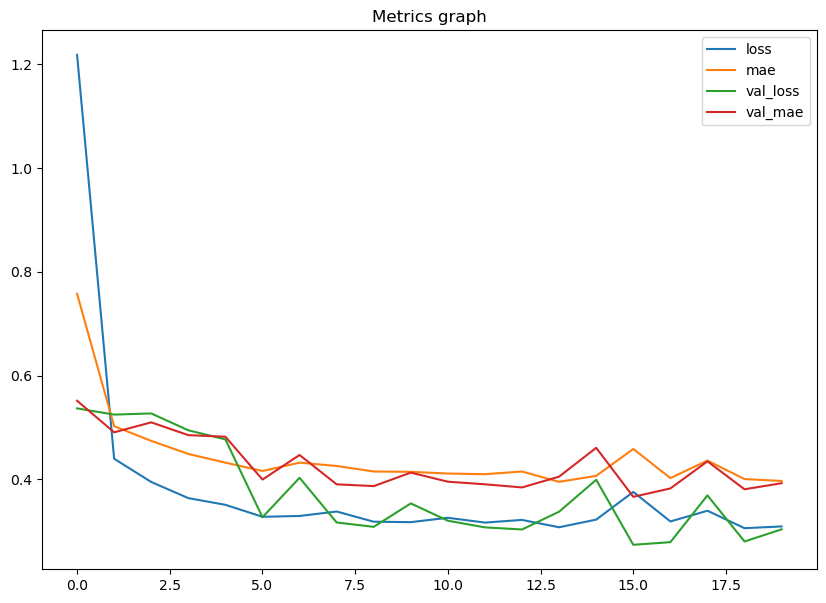

In [15]:
plot_metrics(history)

4/4 [==============================] - 0s 2ms/step


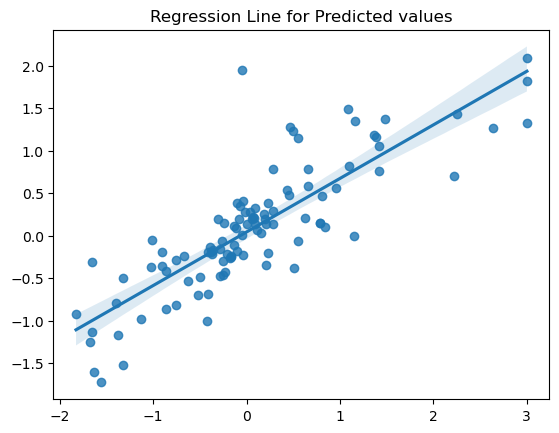

In [16]:
y_pred = make_predictions(model, x_test_scaled)
plot_regression_line(y_test_scaled, y_pred)

In [17]:
regression_metrics_display(y_test_scaled, y_pred)

MAE is 0.3925783720487378
MSE is 0.30369424918312626
R2 score is 0.6912769896988835
